(example_01_quotients_of_s2_trivial)=

# Quotient Bundles 

An example application of `circle_bundles` to a point cloud in a non-Euclidean metric space. By default, $\text{UMAP}$ is used to compute local circular coordinates. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import circle_bundles as cb

First, generate a sample of the product $\mathbb{S}^{2}\times\mathbb{S}^{1}$ as vectors in $\mathbb{R}^{5}$:

In [3]:
n_samples = 5000
sigma = 0.1  #noise level

data, base_points, angles = cb.sample_s2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)

We interpret the base projections as representatives of elements $\mathbb{RP}^{2}$ by using a quotient pseudo-metric which computes the minimum distance between class representatives (this is handled internally by `cb.get_rp2_fibonacci_cover` to construct `U` -- see API reference).  

Similarly, we interpret the data as points in a quotient space by introducing a pseudo-metric which identifies points via the $\mathbb{Z}_{2}$-action below:

$\hspace{2cm}(v,z)\cdot (-1) := (-v,z)$

The resulting space is homeomorphic to the product $\mathbb{RP}^{2}\times\mathbb{S}^{1}$. Note that the base projection map is $\mathbb{Z}_{2}$-equivariant; this is a necessary condition for the quotient to form a well-defined circle bundle.

Construct a cover and bundle object:

### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 237$
- $\#(\text{2-simplices}) = 158$
- *No recorded simplices in dimensions* $\ge 3$

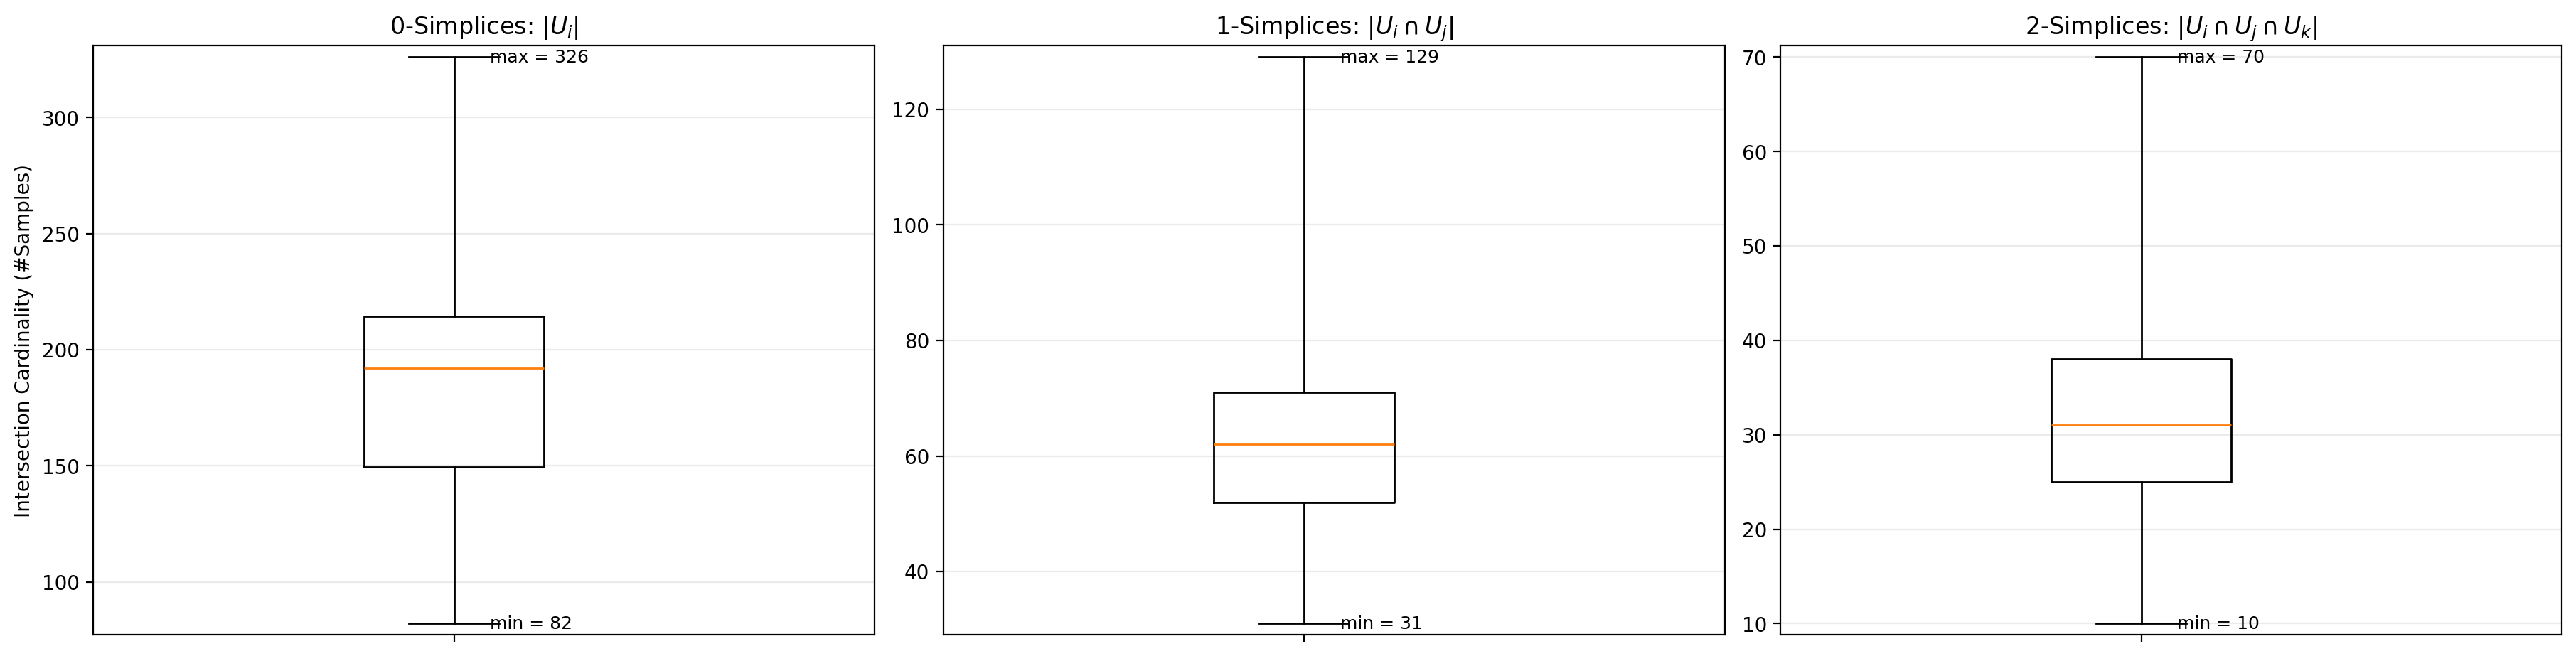

In [4]:
n_landmarks = 80
rp2_cover = cb.get_rp2_fibonacci_cover(base_points, n_pairs = n_landmarks)

total_metric = cb.RP2_TrivialMetric()  
bundle = cb.Bundle(X = data, U = rp2_cover.U, total_metric = total_metric, show_summary = True)

Observe that the Euler characteristic of the nerve of our (good) open cover is $\chi = 80 - 237 + 158 = 1$, as expected for $\mathbb{RP}^{2}$.

Now, compute local trivializations using $\text{UMAP}_{2}$ (the default when `total_metric` is provided) and characteristic classes:

In [5]:
local_triv_result = bundle.get_local_trivs()
class_result = bundle.get_classes(show_classes = True)

<IPython.core.display.Math object>

The characteristic class computation confirms the global topology of the quotient space underlying the dataset.

Next, we interpret the data as points in a different quotient space by introducing a pseudo-metric which identifies points via the $\mathbb{Z}_{2}$-action below:

$\hspace{2cm}(v,z)\cdot (-1) := (-v,-z)$

The resulting space is orientable but non-homeomorphic to the product $\mathbb{RP}^{2}\times\mathbb{S}^{1}$ -- the base projection map is still $\mathbb{Z}_{2}$-equivariant with respect to this new action, so we obtain a well-defined (though non-trivial) circle bundle over $\mathbb{RP}^{2}$.

Construct local circular coordinates using $\text{UMAP}_{2}$ and compute characteristic classes:

In [6]:
total_metric = cb.RP2_TwistMetric()  
bundle = cb.Bundle(X = data, U = rp2_cover.U, total_metric = total_metric)

local_triv_result = bundle.get_local_trivs()
class_result = bundle.get_classes(show_classes = True)

<IPython.core.display.Math object>

Finally, we treat the original dataset as a sampling from a third quotient of $\mathbb{S}^{2}\times\mathbb{S}^{1}$ induced by the $\mathbb{Z}_{2}$ action below:

$\hspace{2cm}(v,z)\cdot (-1) := (-v,\bar{z})$

The resulting space is non-orientable, but the base projection is still $\mathbb{Z}_{2}$-equivariant, so we obtain a well-defined non-orientable circle bundle over $\mathbb{RP}^{2}$. The twisted Euler class of the bundle is trivial. 

Construct local circular coordinates and compute characteristic classes:

In [7]:
total_metric = cb.RP2_FlipMetric()  
bundle = cb.Bundle(X = data, U = rp2_cover.U, total_metric = total_metric)

local_triv_result = bundle.get_local_trivs()
class_result = bundle.get_classes(show_classes = True)

<IPython.core.display.Math object>